## Load Dependencies and the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

df = pd.read_csv("loan.csv", low_memory = False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Dataset Insights

In [2]:
df.shape

(39717, 111)

In [3]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [4]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

## Data Cleaning 

In [5]:
#Missing values per column and return the columns having more than or equal to 50% of missing values
missing_percentage_df = df.isnull().sum()*100/len(df.id)
missing_percentage_df = missing_percentage_df[missing_percentage_df>=50]
missing_percentage_df

mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi                            100.000000
total_cu_t

In [6]:
len(missing_percentage_df)

57

In [7]:
# list of columns that needs to be removed
null_columns = list(missing_percentage_df.index)
null_columns

['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',


In [8]:
#Verifying 57 columns are deleted and we are left with 54 columns now
df = df.drop(columns = null_columns)
df.shape

(39717, 54)

In [9]:
#Remove Customer behaviour variables 
df = df.drop(columns = ['id','member_id','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'])
df.shape

(39717, 31)

In [10]:
#Remove rows with 50 or more % NaN values
min_count = int(0.5*df.shape[1]+1)
df.dropna(axis=0, thresh = min_count, inplace = True)
df.shape

# No row has less than 50% non-null values

(39717, 31)

In [11]:
#Check how many columns have only one unique value and then Remove the same columns
df.nunique().sort_values()

pymnt_plan                        1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
tax_liens                         1
term                              2
verification_status               3
loan_status                       3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
zip_code                        823
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
funded_amnt_inv                8205
installment                   15383
title                       

In [12]:
#Get Columns having only one unique value
unique_column_df = df.nunique()
unique_column_with_one_unique_value_df = unique_column_df[unique_column_df.values == 1]
unique_column_with_one_unique_value_df.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'tax_liens'],
      dtype='object')

In [13]:
# Delete columns having only 1 unique values as they won't be useful for data analysis
df.drop(columns = list(unique_column_with_one_unique_value_df.index), inplace = True)
df.shape

(39717, 23)

In [14]:
#Updated columns list
list(df.columns)

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'pub_rec_bankruptcies']

In [15]:
# Check columns having null values
null_df = df.isnull().sum()
null_df = null_df[null_df > 0]
null_df

emp_title                2459
emp_length               1075
desc                    12940
title                      11
pub_rec_bankruptcies      697
dtype: int64

In [16]:
# Remove desc column as removing 12k rows can manipulate the outcome
df.drop(columns='desc', inplace=True)
null_df = df.isnull().sum()
null_df = null_df[null_df > 0]
null_df

emp_title               2459
emp_length              1075
title                     11
pub_rec_bankruptcies     697
dtype: int64

In [17]:
# Remove rows having nulls
df.dropna(subset=['emp_length', 'title', 'emp_title', 'pub_rec_bankruptcies'], inplace=True)
df.shape

(36539, 22)

In [18]:
# Remove loan_status current as it won't provide any information about the loan
df = df[df["loan_status"] != 'Current']
df["loan_status"].unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

## Data Manipulation

In [19]:
#Analysing columns
df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
url                      object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [20]:
# term
df.term.value_counts()

 36 months    26465
 60 months     9008
Name: term, dtype: int64

In [21]:
# term - removing 'months' from the columns
df.term = df.term.apply(lambda x : x.split()[0])
df.term = df.term

In [22]:
df.term.value_counts()

36    26465
60     9008
Name: term, dtype: int64

In [23]:
# int_rate
df.int_rate.describe()

count      35473
unique       334
top       10.99%
freq         862
Name: int_rate, dtype: object

In [24]:
# int_rate - Remove % from the int_rate column
df.int_rate = df.int_rate.str.strip('%').astype('float')
df.int_rate.describe()

count    35473.000000
mean        11.991532
std          3.703678
min          5.420000
25%          8.940000
50%         11.860000
75%         14.540000
max         24.400000
Name: int_rate, dtype: float64

In [25]:
#grade
df.grade.value_counts()

B    10731
A     9146
C     7212
D     4692
E     2499
F      907
G      286
Name: grade, dtype: int64

In [26]:
# issue_d
df[['issue_d']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35473 entries, 1 to 39680
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   issue_d  35473 non-null  object
dtypes: object(1)
memory usage: 554.3+ KB


In [27]:
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df.issue_d

1       2011-12-01
3       2011-12-01
5       2011-12-01
6       2011-12-01
7       2011-12-01
           ...    
39551   2007-12-01
39562   2007-11-01
39623   2007-10-01
39666   2007-08-01
39680   2007-08-01
Name: issue_d, Length: 35473, dtype: datetime64[ns]

In [28]:
# emp_length
df[['emp_length']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35473 entries, 1 to 39680
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   emp_length  35473 non-null  object
dtypes: object(1)
memory usage: 554.3+ KB


In [29]:
emp_length_dict = {'< 1 year' : 0,'1 year' : 1, '2 years' : 2,'3 years' : 3,'4 years' : 4,'5 years' : 5,'6 years' : 6,'7 years' : 7,'8 years' : 8,'9 years' : 9,'10+ years' : 10}
df = df.replace({'emp_length': emp_length_dict})
df.emp_length.value_counts()

10    8037
2     4094
0     3996
3     3844
4     3219
5     3056
1     2974
6     2066
7     1642
8     1366
9     1179
Name: emp_length, dtype: int64

## Remove Outliers

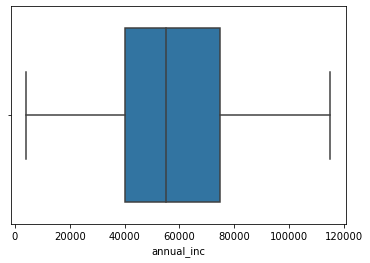

In [38]:
#annual_inc
sns.boxplot(df.annual_inc)
plt.show()

In [39]:
df.annual_inc.quantile([0.5, 0.7,0.80,0.90])

0.5    55000.0
0.7    70000.0
0.8    79885.2
0.9    92000.0
Name: annual_inc, dtype: float64

In [40]:
#remove values after 90 percentile
annual_qp = df['annual_inc'].quantile(0.9)
df = df[df.annual_inc <= annual_qp]

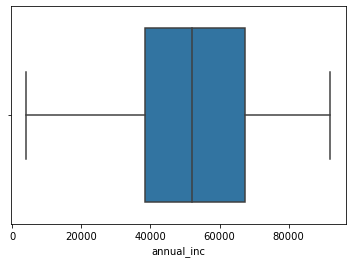

In [41]:
sns.boxplot(df.annual_inc)
plt.show()

## Derived Variables

In [42]:
#changing loan status to numeric
df['loan_status_count'] = df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [43]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies,loan_status_count
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,...,2011-12-01,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0,1
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0.0,0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,...,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,0
6,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8,...,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0.0,0
7,3000,3000,3000.0,36,18.64,109.43,E,E1,MKC Accounting,9,...,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,car,Car Downpayment,900xx,CA,5.35,0.0,0


In [44]:
#deriving month and year from issue_d variable
df["issue_d_year"] = pd.DatetimeIndex(df['issue_d']).year
df['issue_d_month'] = pd.DatetimeIndex(df['issue_d']).strftime('%b')

In [47]:
df.issue_d_month.head(3)

1    Dec
3    Dec
5    Dec
Name: issue_d_month, dtype: object

In [48]:
df.issue_d_year.head(3)

1    2011
3    2011
5    2011
Name: issue_d_year, dtype: int64

In [223]:
# binning for loan amount, annual income, interest rates, dti
df['loan_amnt_bin'] = pd.cut(df['loan_amnt'], [0, 5000, 10000, 20000, 30000, 35000], labels=['0-5000', '5000-10000', '10000-20000', '20000-30000', '30000 +'])
df['annual_inc_bin'] = pd.cut(df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])
df['int_rate_bin'] = pd.cut(df['int_rate'], [5, 10, 15, 20], labels=['5-10', '10-15', '15-20'])
df['dti_bin'] = pd.cut(df['dti'], [0, 5, 10, 15, 20, 25, 30], labels=['0-5', '05-10', '10-15', '15-20', '20-25','25-30'])

In [224]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,addr_state,dti,pub_rec_bankruptcies,loan_status_count,issue_d_year,issue_d_month,loan_amnt_bin,annual_inc_bin,int_rate_bin,dti_bin
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,...,GA,1.00,0.0,1,2011,Dec,0-5000,20000-40000,15-20,0-5
9,5375,5375,5350.0,60,12.69,121.45,B,B5,Starbucks,0,...,TX,18.08,0.0,1,2011,Dec,5000-10000,0-20000,10-15,15-20
12,9000,9000,9000.0,36,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,0,...,VA,10.08,0.0,1,2011,Dec,5000-10000,20000-40000,10-15,10-15
24,6000,6000,6000.0,36,11.71,198.46,B,B3,bmg-educational,1,...,CA,2.40,0.0,1,2011,Dec,5000-10000,60000-80000,10-15,0-5
26,15000,15000,8725.0,36,14.27,514.64,C,C2,nyc transit,9,...,NY,15.22,0.0,1,2011,Dec,10000-20000,40000-60000,10-15,15-20


## Data Analysis - Univariate

### Quantitative Variables

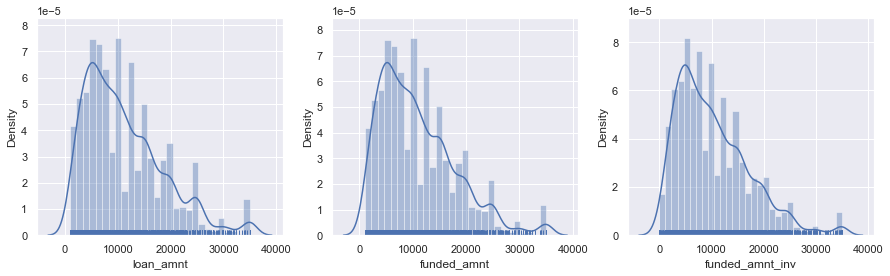

In [225]:
# distribution of loan amount , funded amount and funded amount using distribution plot
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(df['loan_amnt'],rug = True)
plt.subplot(1,3,2)
sns.distplot(df['funded_amnt'],rug = True)
plt.subplot(1,3,3)
sns.distplot(df['funded_amnt_inv'],rug = True)
plt.show()

##### Amount distribution is very similar, and we can use loan amount for further analysis

####  Loan amount analysis

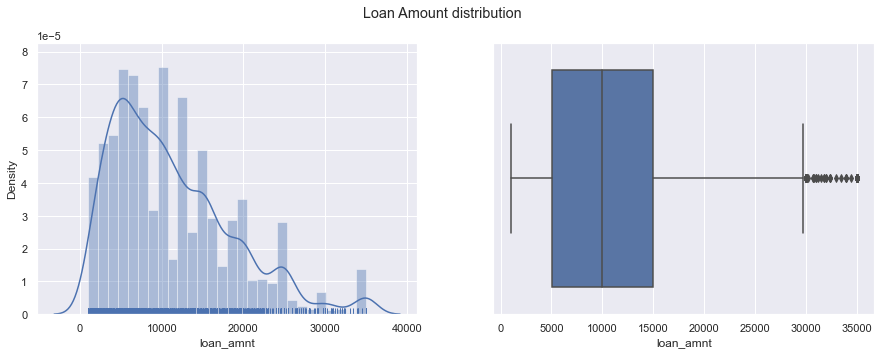

In [226]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
#Distribution plot
sns.distplot(df.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(df.loan_amnt)
plt.suptitle('Loan Amount distribution')
plt.show()

##### most of the loan amount lies between 5000 and 15000

#### Interest Rate Analysis

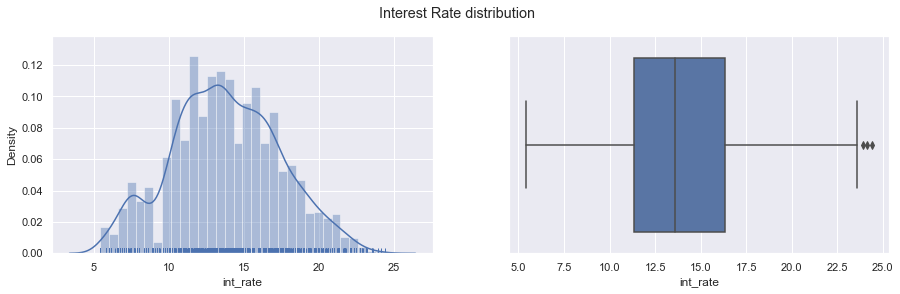

In [227]:
#Distribution and Boxplot charts
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(df.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(df.int_rate)
plt.suptitle('Interest Rate distribution')
plt.show()

##### Observations
- Most of the interest rate lies between 9% to 14.5%.

#### Analyzing Annual Income

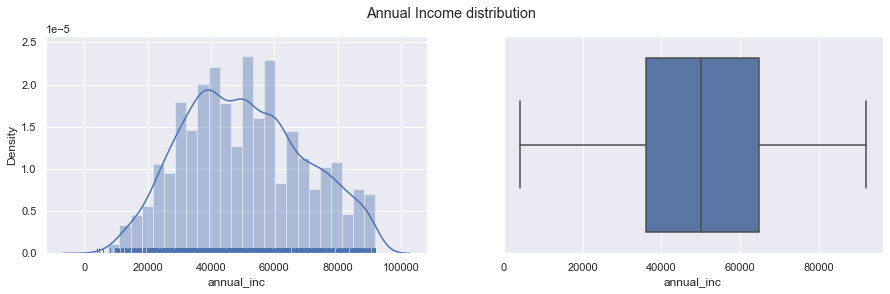

In [228]:
# distribution and boxchart
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(a=df.annual_inc, rug=True)
plt.subplot(1,2,2)
sns.boxplot(df.annual_inc)
plt.suptitle('Annual Income distribution')
plt.show()

##### Observations
- Most of the borrower's annual income are in range of 40k to 80k.

### Unordered Categorical Variables

#### Home Ownership Analysis

<Figure size 1080x360 with 0 Axes>

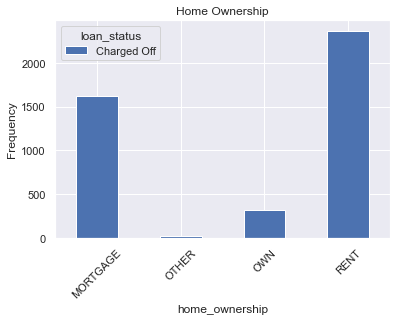

In [229]:
plt.figure(figsize=(15,5))
df.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)
plt.title("Home Ownership",fontdict={'fontsize':12})
plt.xlabel("home_ownership")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

#####  Observations
- Most of them have taken loan who are in rent or mortgage their home.
- Charged Off loan status is also high for these two home ownership.

### Segmented Univariate Analysis

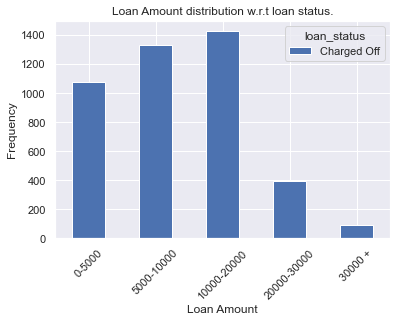

In [230]:
df.groupby('loan_amnt_bin')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.title("Loan Amount distribution w.r.t loan status.")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

##### Observations
- Under 14k most of the borrowers take the loan amount and charged off status is also high for those amount.

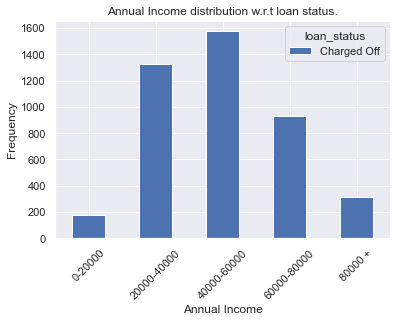

In [231]:
df.groupby('annual_inc_bin')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.title("Annual Income distribution w.r.t loan status.")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

##### Observations
- Most of the borrower's annual income is in the range of 40k to 60k.

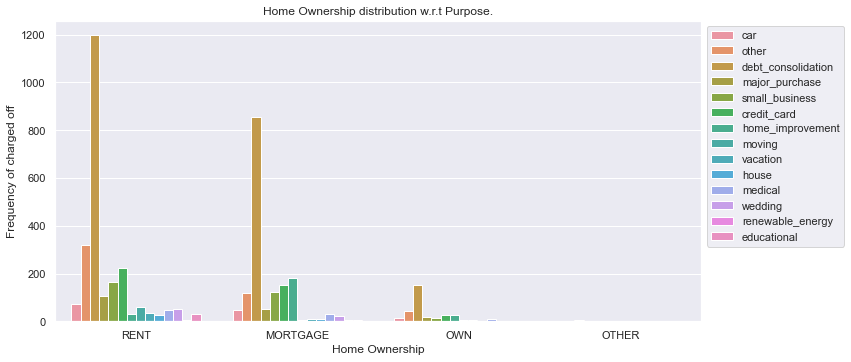

In [232]:
#home ownership and loan purpose for defaulted
plt.figure(figsize=(10,5))
df=df[df['loan_status']=='Charged Off']
sns.countplot(x='home_ownership',hue='purpose', data=df)
plt.tight_layout()
plt.title("Home Ownership distribution w.r.t Purpose.")
plt.xlabel("Home Ownership")
plt.ylabel("Frequency of charged off")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

##### Observations
- Most of the borrower's who took loan for the purpose of debt consolidation and for rent has highest number of Charged off status

# Bivariate Analysis

Loan amount analysis with all the other variables

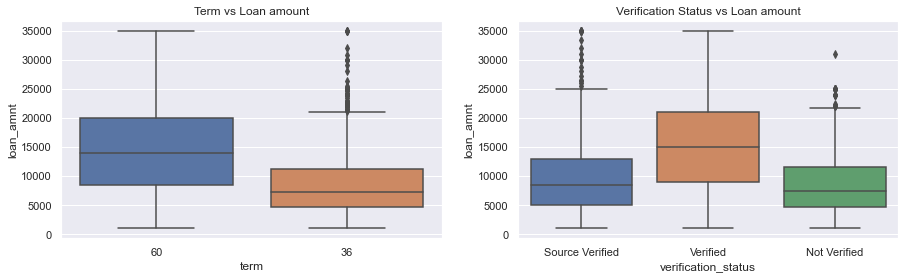

In [233]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="loan_amnt", data=df)
plt.title("Term vs Loan amount")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="loan_amnt", data=df)
plt.title("Verification Status vs Loan amount")
plt.show()

##### Observations
- Loan amount and tenure are directly proportional to each other.
- The Verified borrower gets more loan amount than Non-verified and Source Verified

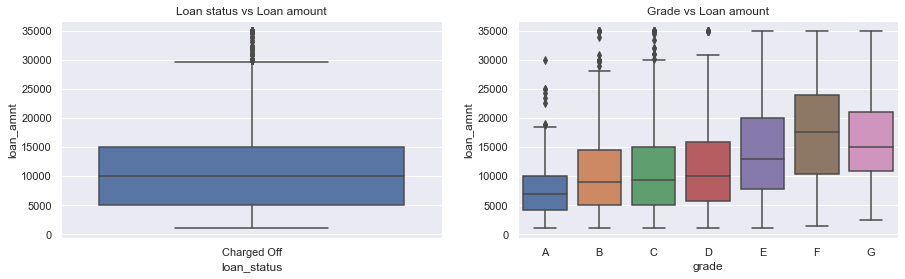

In [234]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="loan_amnt", data=df)
plt.title("Loan status vs Loan amount")
plt.subplot(1,2,2)

grade_order = df["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="loan_amnt", order=grade_order, data=df)
plt.title("Grade vs Loan amount")
plt.show()

##### Observations
- The charged off customers were having higher loan amount than fully paid.
- Grade F & G have max amount of loan. Amount of loan is inversely proportional to Grade
- Grade is directly proportional to the risk of default

Text(0.5, 1.0, 'Home Ownership vs Loan amount')

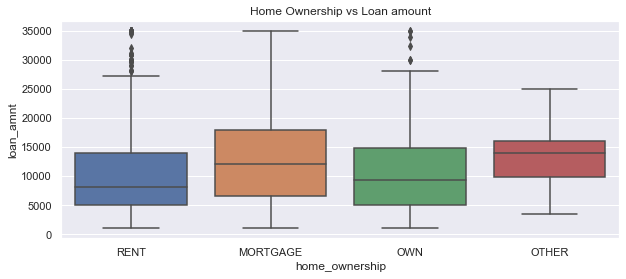

In [235]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="loan_amnt", data=df)
plt.title("Home Ownership vs Loan amount")

##### Observations
- The borrower who are from Mortgage have taken higher amount of loan than others.

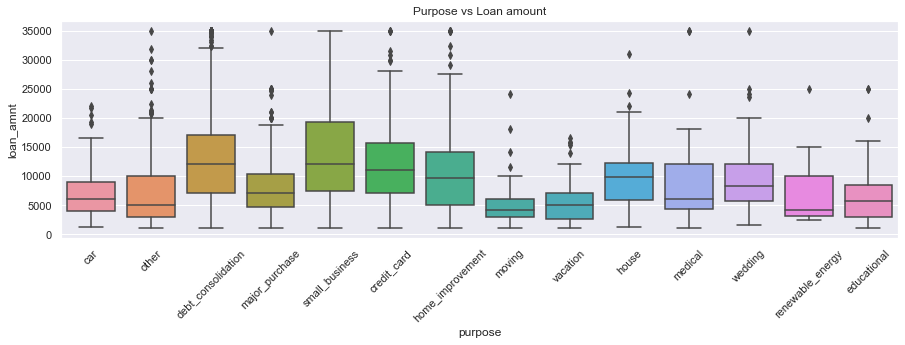

In [236]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="loan_amnt", data=df)
plt.title("Purpose vs Loan amount")
plt.xticks(rotation=45)
plt.show()

##### Observations
- The startup with small business borrowers take high loan than others. Then comes debt_consolidation.

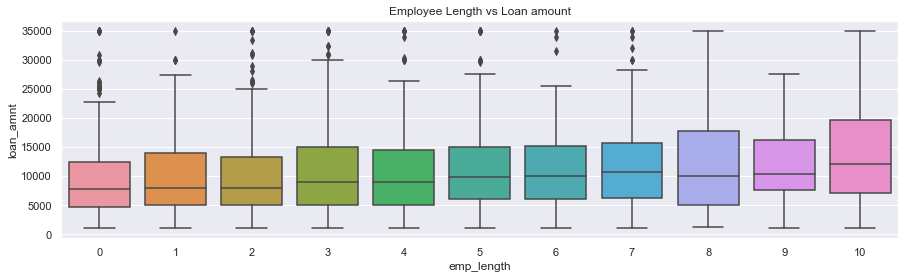

In [237]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="loan_amnt", data=df)
plt.title("Employee Length vs Loan amount")
plt.show()

##### Observations
- The borrower who has 10+ years of experience are taking high amount of loan than others and borrowers with less than 1 year of experience are taking lesser amount of loan compared to others. 

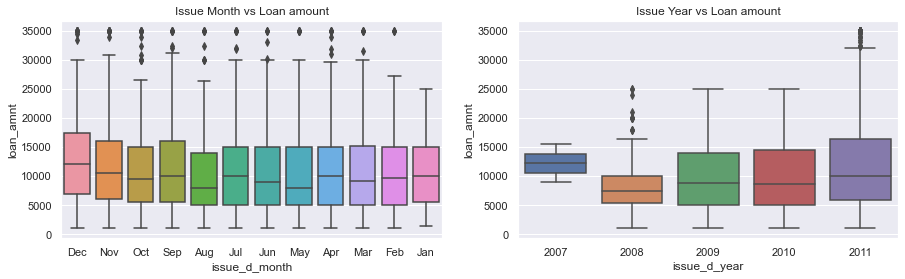

In [238]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="issue_d_month", y="loan_amnt", data=df)
plt.title("Issue Month vs Loan amount")
plt.subplot(1,2,2)
sns.boxplot(x="issue_d_year", y="loan_amnt", data=df)
plt.title("Issue Year vs Loan amount")
plt.show()

##### Observations
- Highest loan amount is taken in the month of Dec and May whereas median value doesn't vary too much.
- Highest loan amount is taken in the year 2008 and 2011

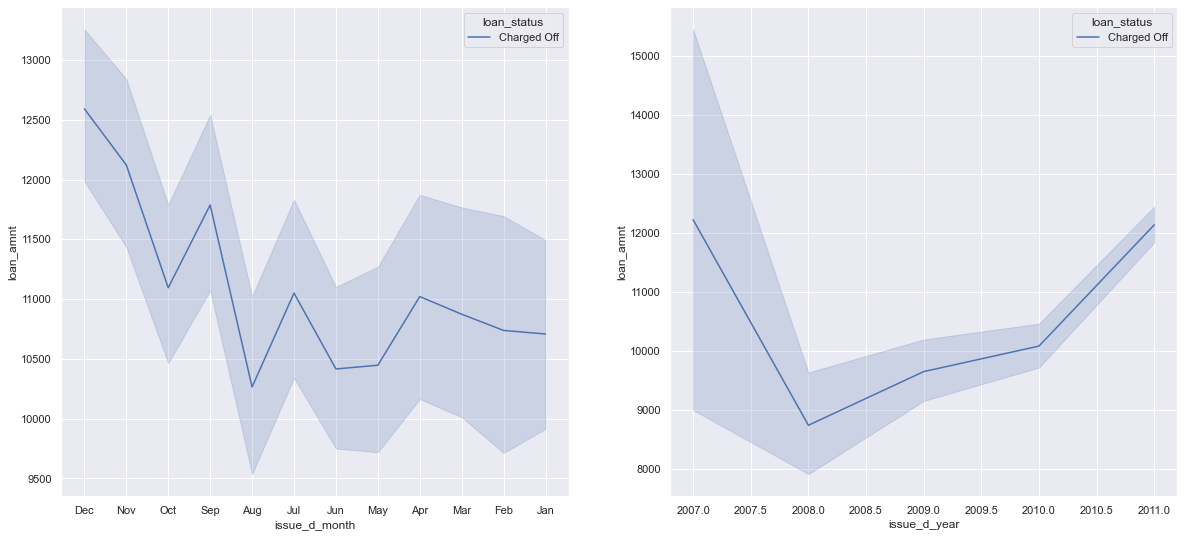

In [239]:
plt.figure(figsize=(20,9))
plt.subplot(121)
sns.lineplot(data =df ,y='loan_amnt', x='issue_d_month', hue ='loan_status')
plt.subplot(122)
sns.lineplot(data =df ,y='loan_amnt', x='issue_d_year', hue ='loan_status')
plt.show()

##### Observations
- Charged off frequency is directly proportional to loan amount
- The borrowers who took the loan in the month of november and december are having highest charged off ratio with highest loan amount.

Annual Income analysis with other variables

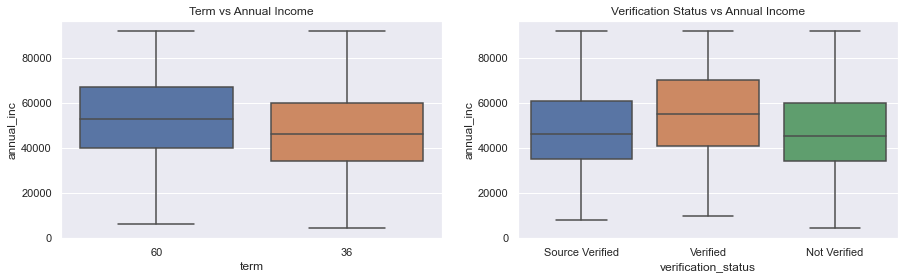

In [240]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="annual_inc", data=df)
plt.title("Term vs Annual Income")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="annual_inc", data=df)
plt.title("Verification Status vs Annual Income")
plt.show()

##### Observations
- The borrowers who have high annual income are taking loans for 60 months tenure as compared to 36 months.
- The verified borrowers have higher annual income than others.

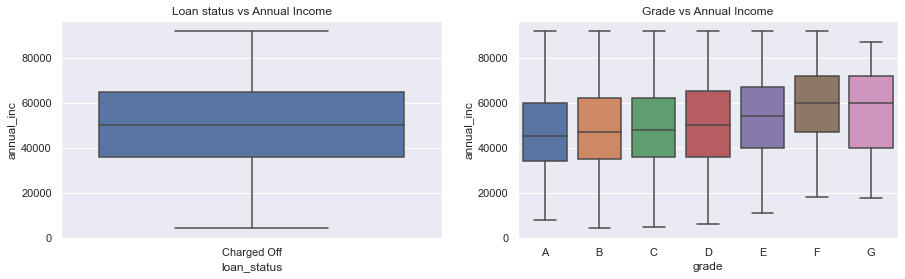

In [241]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="annual_inc", data=df)
plt.title("Loan status vs Annual Income")
plt.subplot(1,2,2)

grade_order = df["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="annual_inc", order= grade_order, data=df)
plt.title("Grade vs Annual Income")
plt.show()

##### Observations
- Loan amount and Tenure are directly proportional
- Verified borrower gets more loan amount than Non-verified and Source Verified

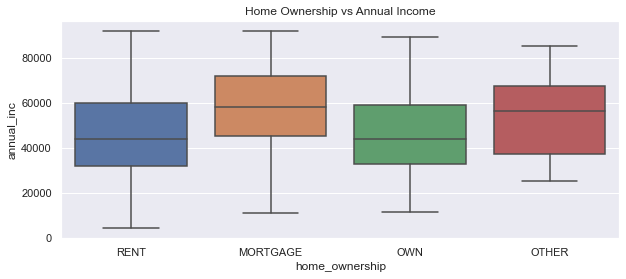

In [242]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="annual_inc", data=df)
plt.title("Home Ownership vs Annual Income")
plt.show()

##### Observations
- The borrowers having the status as Mortgage have high annual income than others.

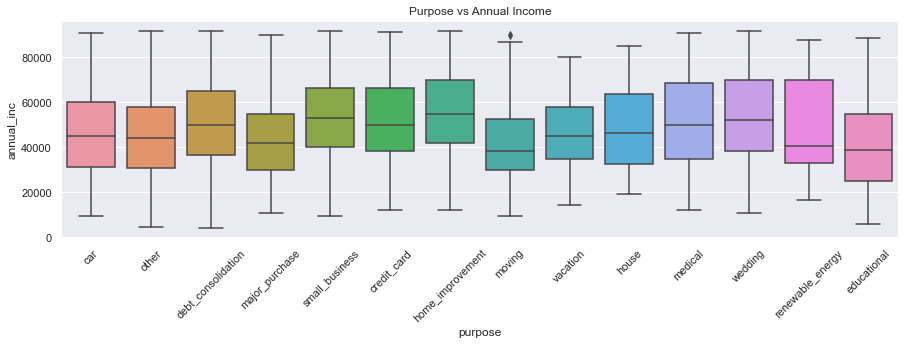

In [243]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="annual_inc", data=df)
plt.title("Purpose vs Annual Income")
plt.xticks(rotation=45)
plt.show()

##### Observations
- The borrowers with high annual income are taking loans mostly for home improvement and small business.

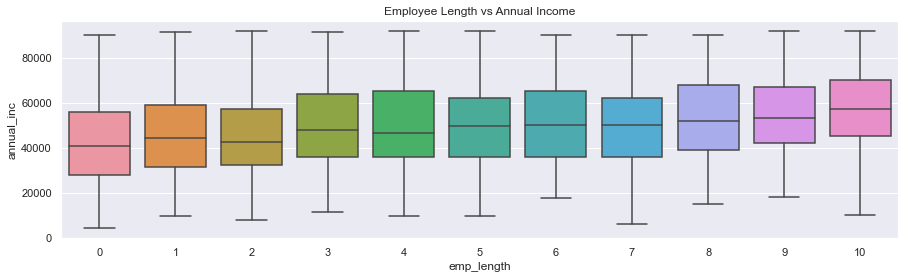

In [244]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="annual_inc", data=df)
plt.title("Employee Length vs Annual Income")
plt.show()

##### Observations
- The borrowers with 10+ experience are having highest annual income than others

Visualization of Interest Rate with other variables

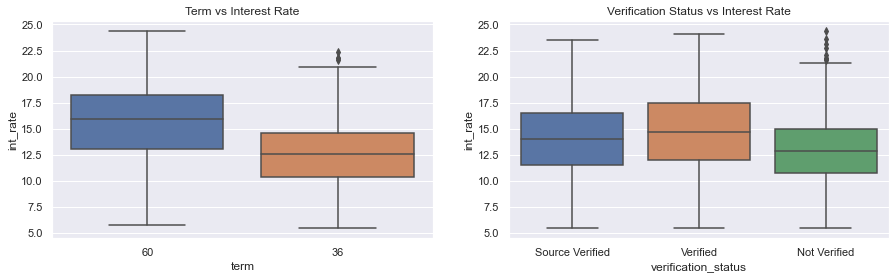

In [245]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="int_rate", data=df)
plt.title("Term vs Interest Rate")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="int_rate", data=df)
plt.title("Verification Status vs Interest Rate")
plt.show()

##### Observations
- Interest rate is less for those who take loan for 36 months and high for 60 months. 
- Verified borrower gets more loan at higher interest rate as compared to the others.

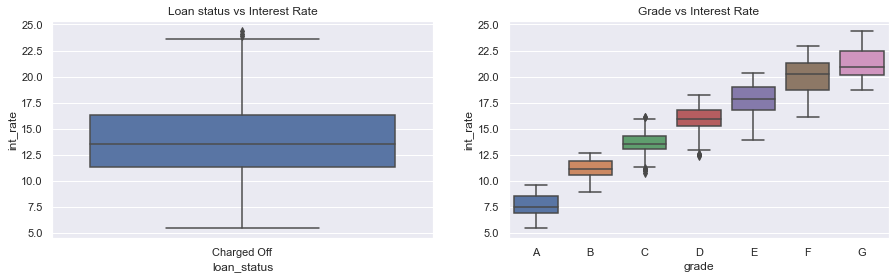

In [246]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="int_rate", data=df)
plt.title("Loan status vs Interest Rate")
plt.subplot(1,2,2)

grade_order = df["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="int_rate", order= grade_order, data=df)
plt.title("Grade vs Interest Rate")
plt.show()

##### Observations
- The borrowers who have high interest rate are mostly defaulters.
- In grade vs interest rate we can say that, as the grade decreases, interest rate increses.

Text(0.5, 1.0, 'Home Ownership vs Interest Rate')

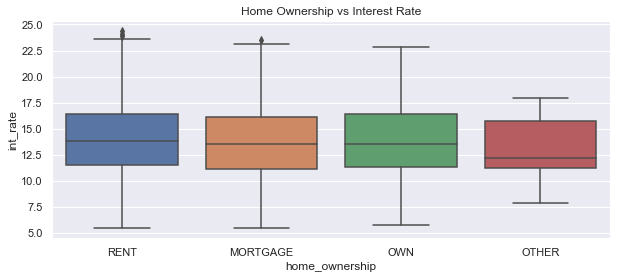

In [247]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="int_rate", data=df)
plt.title("Home Ownership vs Interest Rate")

##### Observations
- All the borrowers who are in rent are getting high interest rate. The borrowers with own and mortgage are getting loan with less interest rate also due to security purpose.

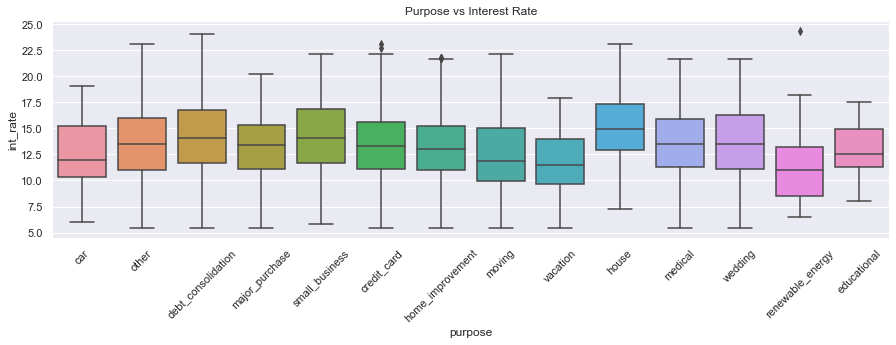

In [248]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="int_rate", data=df)
plt.title("Purpose vs Interest Rate")
plt.xticks(rotation=45)
plt.show()

##### Observations
- Small business , debt consolidation and house loan are getting loan at high interest rate than others.

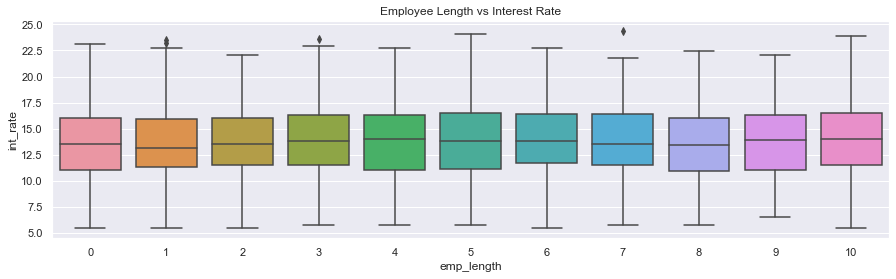

In [249]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="int_rate", data=df)
plt.title("Employee Length vs Interest Rate")
plt.show()

##### Observations
- No relationship between Employment length and interest rate.

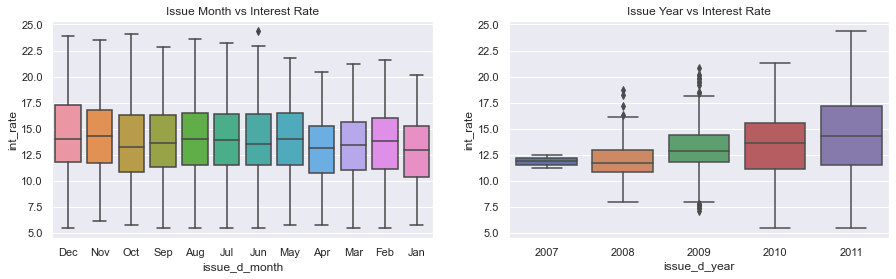

In [250]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="issue_d_month", y="int_rate", data=df)
plt.title("Issue Month vs Interest Rate")
plt.subplot(1,2,2)
sns.boxplot(x="issue_d_year", y="int_rate", data=df)
plt.title("Issue Year vs Interest Rate")
plt.show()

##### Observations
- Rate of interest is different for all the years but the median is almost the same

DTI comparison with other variables

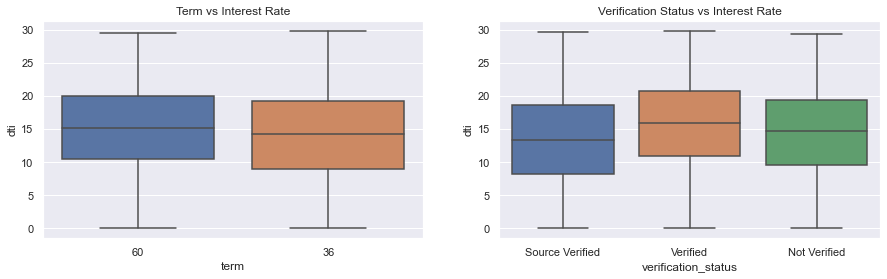

In [251]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="dti", data=df)
plt.title("Term vs Interest Rate")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="dti", data=df)
plt.title("Verification Status vs Interest Rate")
plt.show()

##### Observations
- The dti ratio is high for the borrower who have 60 months tenure.
- The verified borrowers are having high dti ratio.

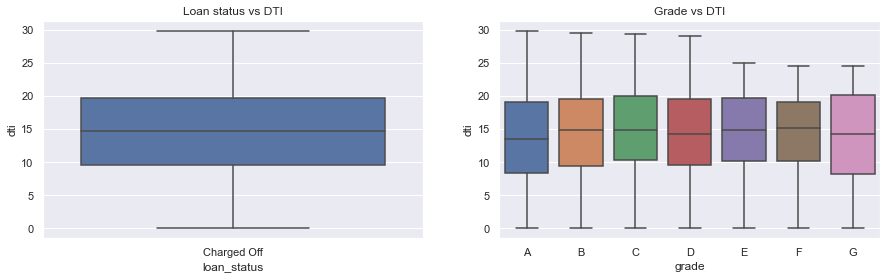

In [252]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="dti", data=df)
plt.title("Loan status vs DTI")
plt.subplot(1,2,2)

grade_order = df["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="dti", order= grade_order, data=df)
plt.title("Grade vs DTI")
plt.show()

##### Observations
- Most of the charged off borrowers have higher dti ratio.
- As grade decreases dti ratio increases

Text(0.5, 1.0, 'Home Ownership vs DTI')

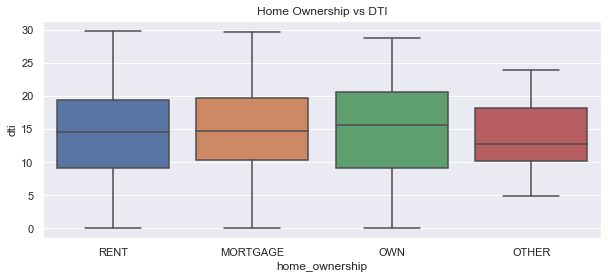

In [253]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="dti", data=df)
plt.title("Home Ownership vs DTI")

##### Observations
- The borrower with own and rent home status have high dti ratio than others.

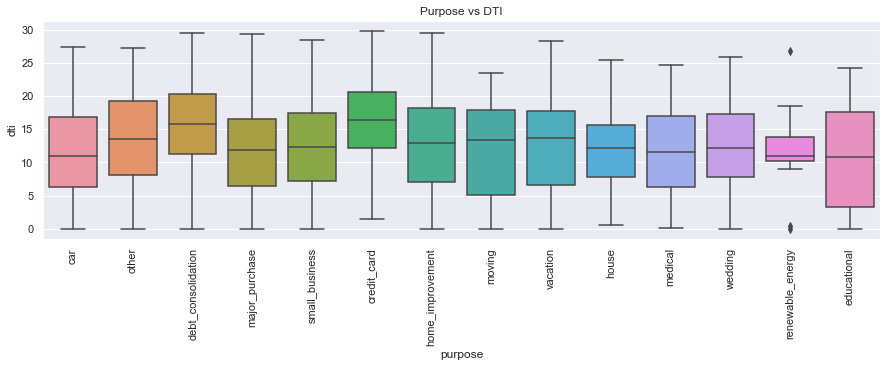

In [254]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="dti", data=df)
plt.title("Purpose vs DTI")
plt.xticks(rotation=90)
plt.show()

##### Observations
- The borrower who takes loan for the purpose of debt and credit card are having high dti ratio than others. 

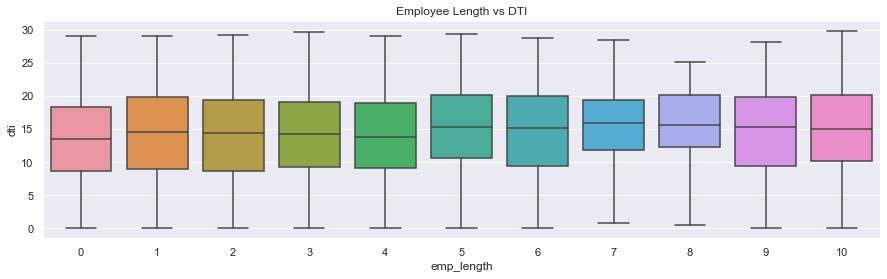

In [255]:
plt.figure(figsize=(15,4))
sns.boxplot(x="emp_length", y="dti", data=df)
plt.title("Employee Length vs DTI")
plt.show()

##### Observations
- No much relation between employee length and dti ratio. 

# Multivariate Analysis

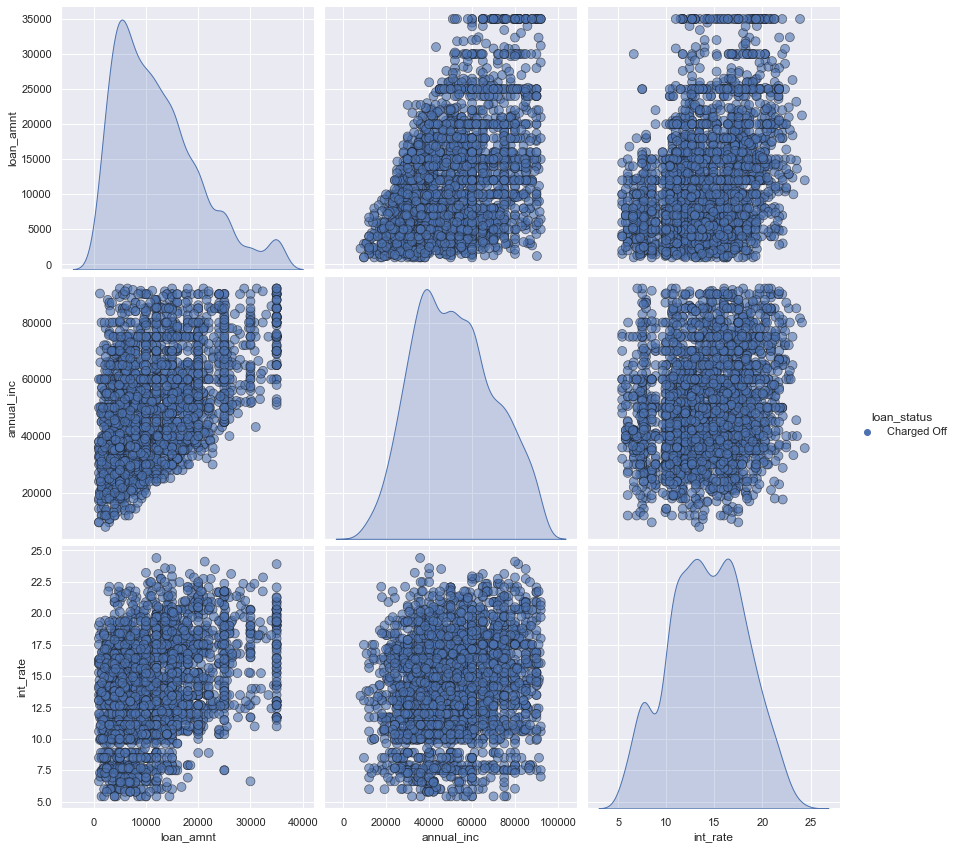

In [256]:
# loan_amnt,annual_inc, and int_rate columns for year 2011 chosen randomly
sns.pairplot(df[df['issue_d_year'] == 2011], 
             vars = ['loan_amnt', 'annual_inc', 'int_rate'], 
             hue = 'loan_status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);
plt.show()

##### Observations
- Higher the annual income higher the loan amount slightly
- Interest rate is increasing with loan amount increase the results for high charged off.

## Recommendation

- After analysing purpose of loan data we can conclude that loans taken for medical vacation , house , education are fully paid but charge off loan is high for debt consolidation.
- After analysing home ownership most have taken loan who are in rent or mortgage their home. Loan defaulter probability for people living in rented house is high. n loan amount vs purpose variable we can say that, to startup with small business borrowers are taking high loan than others. Then comes debt_consolidation.
- From data we can analyse that loan is taken mostly for 36 months as compared to 60 months. Charged Off loan status is also high for 60 months term wrt 36 months. 
- From above we can say that, under 14k most of the borrowers take the loan amount and charged off status is also high for those amount.
- From above chart we can say that, most of the borrower's who took loan for the purpose of debt consolidation has highest number of Charged off status and those who are in rent as the most.
- In loan amount vs Loan status variable we can say that, charged off were having higher loan amount than fully paid.
- Loan taken for small buissness have higher Charged Off loan status .
- In purpose vs dti variable we can say that, the borrower who takes loan for the purpose of debt consolidation and credit card are having high dti ratio than others. And higher the dti ratio shows then Charged off status is also high.
- Data shows when employee income increases charged off status deacreases.
- The borrowers who are from NV, AK, TN state are mostly getting charged off.
- Most of the verified borrowers are getting charged off then others.
- Annual Income and Verification process is the main deriving factors behind loan default. 
- Providing loan for small businesses or people who lives in rented house also shows strong indicators of default.